In [4]:
# 📦 Import core libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# 🔧 Notebook settings
pd.set_option('display.max_colwidth', 200)
plt.style.use("seaborn-v0_8-whitegrid")



In [5]:
# 📂 Load raw email dataset (uncleaned version)
df = pd.read_csv("emails.csv")

# 🧠 Basic info
print("📊 Dataset shape:", df.shape)
print("\n📄 Column names:", df.columns.tolist())

# 🔍 Show first 5 emails
df.head()


📊 Dataset shape: (500, 5)

📄 Column names: ['Sender', 'Subject', 'Snippet', 'Date', 'Label']


,Sender,Subject,Snippet,Date,Label
0,LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>,“data science specialist”: GE Aerospace - Data Science Specialist,GE Aerospace Data Science Specialist: Job Description SummaryThe Data Science… ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏...,"Sat, 5 Apr 2025 11:02:08 +0000 (UTC)",NaN
1,IMS India <admission@connect.imsindia.com>,Exclusive Webinar + A BIG Reveal—Don’t Miss Out!,"To view this email as a web page, go here. This email was sent by: IMS Learning Resources Pvt. Ltd. IMS Corporate OfficeE Block, 6th Floor, NCL Bandra Premises,Bandra Kurla Complex, Bandra (E) Mum...","Sat, 05 Apr 2025 04:46:53 -0600",NaN
2,Swiggy <no-reply@swiggy.in>,"Avinash, IT’S A BIGGIE! 🏏",And it&#39;s going straight over the boundary for a six. Don&#39;t know what we&#39;re talking about? Tap! ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌...,"Sat, 05 Apr 2025 15:53:39 +0530",NaN
3,Zomato <noreply@mailers.zomato.com>,Don't let this go to waste...,"Zomato delivers food from top restaurants, with on-time delivery at your doorstep. Enjoy amazing offers like up to 60% OFF and save big when hunger strikes. Explore top-rated places in your city and","Sat, 05 Apr 2025 07:55:11 +0000 (UTC)",NaN
4,Quora Digest <english-quora-digest@quora.com>,"As a PhD advisor, how do you fire a student?","As Ph. D. Advisor, I had to do it twice. The first time was for plagiarism and the second time was due diligence on a research contract. In the first case, the student had copied a book chapter… Top","Sat, 05 Apr 2025 09:43:00 +0000",NaN


In [6]:
# 🧹 Step 3: Combine subject + snippet
df['text'] = df['Subject'].fillna('') + ' ' + df['Snippet'].fillna('')

# ✅ Check before cleaning
df[['Sender', 'Subject', 'Snippet', 'text']].head(3)


,Sender,Subject,Snippet,text
0,LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>,“data science specialist”: GE Aerospace - Data Science Specialist,GE Aerospace Data Science Specialist: Job Description SummaryThe Data Science… ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏...,“data science specialist”: GE Aerospace - Data Science Specialist GE Aerospace Data Science Specialist: Job Description SummaryThe Data Science… ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏...
1,IMS India <admission@connect.imsindia.com>,Exclusive Webinar + A BIG Reveal—Don’t Miss Out!,"To view this email as a web page, go here. This email was sent by: IMS Learning Resources Pvt. Ltd. IMS Corporate OfficeE Block, 6th Floor, NCL Bandra Premises,Bandra Kurla Complex, Bandra (E) Mum...","Exclusive Webinar + A BIG Reveal—Don’t Miss Out! To view this email as a web page, go here. This email was sent by: IMS Learning Resources Pvt. Ltd. IMS Corporate OfficeE Block, 6th Floor, NCL Ban..."
2,Swiggy <no-reply@swiggy.in>,"Avinash, IT’S A BIGGIE! 🏏",And it&#39;s going straight over the boundary for a six. Don&#39;t know what we&#39;re talking about? Tap! ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌...,"Avinash, IT’S A BIGGIE! 🏏 And it&#39;s going straight over the boundary for a six. Don&#39;t know what we&#39;re talking about? Tap! ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌..."


In [7]:
# 🧼 Step 3B: Clean email text

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"&[a-z]+;", '', text)  # Remove HTML entities like &nbsp; &amp;
    text = re.sub(r"[^a-z0-9\s]", '', text)  # Remove emojis and non-alphanumeric
    text = re.sub(r"\s+", ' ', text).strip()  # Normalize whitespace
    return text

df['clean_text'] = df['text'].apply(clean_text)

# 🧪 Preview cleaned output
df[['text', 'clean_text']].head(3)


,text,clean_text
0,“data science specialist”: GE Aerospace - Data Science Specialist GE Aerospace Data Science Specialist: Job Description SummaryThe Data Science… ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏...,data science specialist ge aerospace data science specialist ge aerospace data science specialist job description summarythe data science
1,"Exclusive Webinar + A BIG Reveal—Don’t Miss Out! To view this email as a web page, go here. This email was sent by: IMS Learning Resources Pvt. Ltd. IMS Corporate OfficeE Block, 6th Floor, NCL Ban...",exclusive webinar a big revealdont miss out to view this email as a web page go here this email was sent by ims learning resources pvt ltd ims corporate officee block 6th floor ncl bandra premises...
2,"Avinash, IT’S A BIGGIE! 🏏 And it&#39;s going straight over the boundary for a six. Don&#39;t know what we&#39;re talking about? Tap! ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌...",avinash its a biggie and it39s going straight over the boundary for a six don39t know what we39re talking about tap


In [8]:
# 🧠 FINAL Asthra MailGuard Labeler

def refined_label(row):
    sender = row['Sender'].lower()
    subject = row['Subject'].lower() if pd.notna(row['Subject']) else ""
    snippet = row['Snippet'].lower() if pd.notna(row['Snippet']) else ""

    # --- Result Notification ---
    result_keywords = ['you are selected', 'regret to inform', 'shortlisted', 'not selected',
                       'interview result', 'application update', 'status update',
                       'we are pleased to inform', 'we are sorry to inform',
                       'hiring decision', 'congrats', 'recruitment outcome',
                       "you've been selected", "we regret to inform you"]

    if any(key in subject for key in result_keywords):
        return 'result_notification'

    # --- Job Alerts ---
    if any(key in sender for key in ['linkedin', 'naukri', 'indeed', 'jobalertshub']):
        if 'invite' in subject or 'connect' in subject:
            return 'message'
        return 'job_alert'

    # --- Education ---
    if 'crio' in sender:
        if any(key in subject for key in ['test', 'course', 'analytics', 'fellowship', 'lesson']):
            return 'education'
        return 'promo'
    if any(key in sender for key in ['cs50', 'mongodb', 'coursera', 'upgrad', 'edureka']):
        return 'education'

    # --- Financial (only non-promo banking) ---
    if any(bank in sender for bank in ['sbmbank', 'hdfc', 'icici', 'zerodha', 'upstox']):
        if any(promo in subject for promo in ['offer', 'save', 'discount', 'gift', 'win']):
            return 'promo'
        return 'financial'

    # --- Promotions (general brands) ---
    if any(key in sender for key in ['zomato', 'swiggy', 'flipkart', 'amazon', 'tirabeauty', 'ikea']):
        return 'promo'
    if any(promo in subject for promo in ['offer', 'deal', 'discount', 'sale', 'limited time', 'flash']):
        return 'promo'

    # --- Social Feeds ---
    if any(key in sender for key in ['quora', 'facebook', 'instagram', 'youtube']):
        return 'social'

    # --- Messages / Invitations ---
    if 'invitation' in subject or 'connect' in subject:
        return 'message'

    # --- Default fallback ---
    return 'other'

# Apply labels
df['Category'] = df.apply(refined_label, axis=1)

# View label distribution
df['Category'].value_counts()


Category
other        265
job_alert    125
promo         37
education     36
financial     16
message       11
social        10
Name: count, dtype: int64

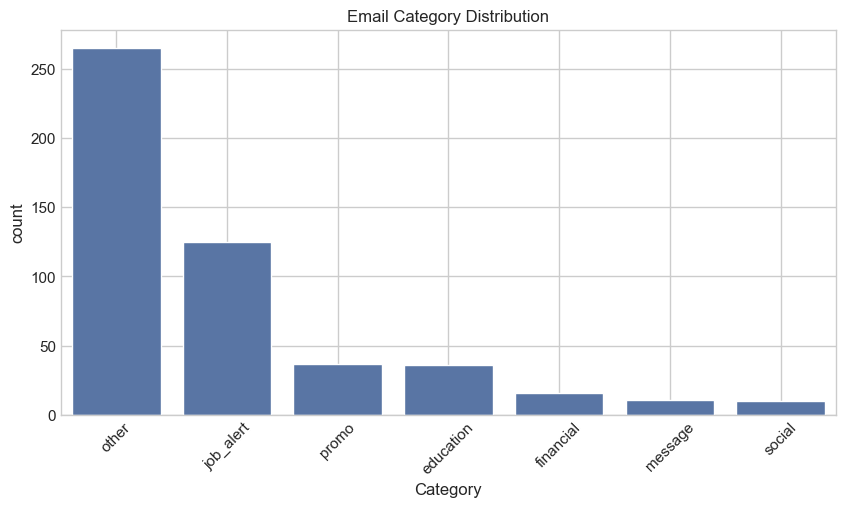

In [9]:
# 📊 Step 5A: Visualize category distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title("Email Category Distribution")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [10]:
# 📤 Step 5B: Prepare features and labels

X = df['clean_text']
y = df['Category']

# Split train/test (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 400
Test size: 100


In [11]:
# 🔠 Step 6: TF-IDF Vectorization (with unigrams + bigrams)

# Initialize vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit only on training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"🔤 TF-IDF matrix (train): {X_train_vec.shape}")
print(f"🔤 TF-IDF matrix (test):  {X_test_vec.shape}")


🔤 TF-IDF matrix (train): (400, 5000)
🔤 TF-IDF matrix (test):  (100, 5000)


📄 Classification Report:

              precision    recall  f1-score   support

   education       1.00      0.71      0.83         7
   financial       1.00      1.00      1.00         2
   job_alert       0.95      0.78      0.86        27
     message       1.00      1.00      1.00         2
       other       0.79      0.94      0.86        52
       promo       0.57      0.67      0.62         6
      social       0.00      0.00      0.00         4

    accuracy                           0.83       100
   macro avg       0.76      0.73      0.74       100
weighted avg       0.81      0.83      0.81       100



d:\Asthra-Mailgaurd\asthra_mailguard_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Asthra-Mailgaurd\asthra_mailguard_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Asthra-Mailgaurd\asthra_mailguard_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

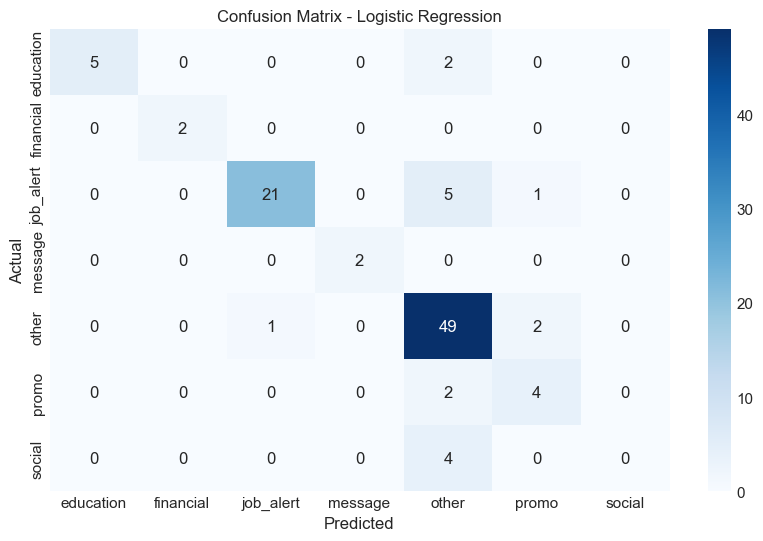

In [12]:
# 🤖 Step 7: Train Logistic Regression with balanced class weights
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
lr_model = LogisticRegression(max_iter=300, class_weight='balanced')
lr_model.fit(X_train_vec, y_train)

# Predict
y_pred = lr_model.predict(X_test_vec)

# 📊 Evaluation
print("📄 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 📉 Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📄 Random Forest Classification Report:

              precision    recall  f1-score   support

   education       1.00      0.71      0.83         7
   financial       1.00      1.00      1.00         2
   job_alert       1.00      0.70      0.83        27
     message       1.00      0.50      0.67         2
       other       0.74      1.00      0.85        52
       promo       1.00      0.50      0.67         6
      social       0.00      0.00      0.00         4

    accuracy                           0.82       100
   macro avg       0.82      0.63      0.69       100
weighted avg       0.83      0.82      0.80       100



d:\Asthra-Mailgaurd\asthra_mailguard_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Asthra-Mailgaurd\asthra_mailguard_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Asthra-Mailgaurd\asthra_mailguard_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

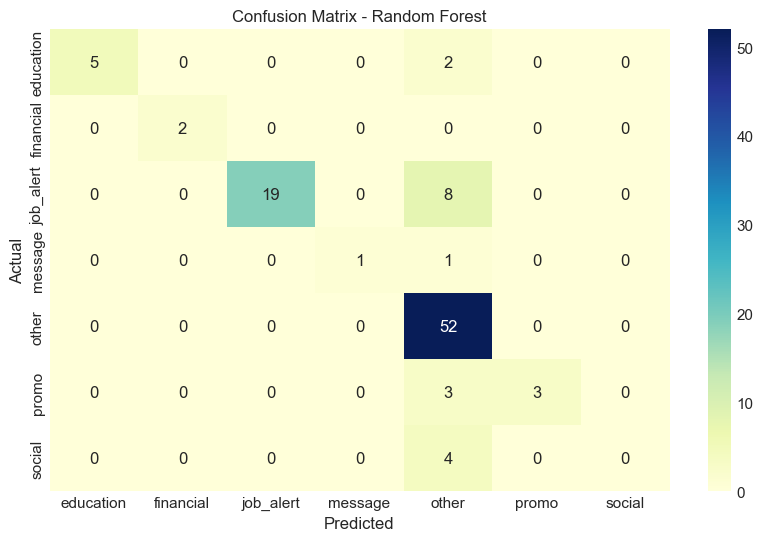

In [13]:
# 🌲 Step 8: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)

# Train
rf_model.fit(X_train_vec, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_vec)

# 📊 Evaluation
print("📄 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# 📉 Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
plt.figure(figsize=(10,6))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_, cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib

# 📥 Load your saved model + vectorizer
model = joblib.load("asthra_email_model.pkl")
vectorizer = joblib.load("asthra_email_vectorizer.pkl")

# 🧪 Predict labels + probabilities
X_all = vectorizer.transform(df['clean_text'])
predicted_labels = model.predict(X_all)
confidence_scores = np.max(model.predict_proba(X_all), axis=1)

# 📊 Add predictions + confidence to dataframe
df['Predicted'] = predicted_labels
df['Confidence'] = confidence_scores.round(3)

# 🧾 Save prediction log
df[['Sender', 'Subject', 'Snippet', 'Predicted', 'Confidence']].to_csv("predictions_log.csv", index=False)
print("✅ predictions_log.csv generated with labels and confidence scores.")


In [15]:
import joblib

# 💾 Save the logistic regression model
joblib.dump(lr_model, "asthra_email_model.pkl")

# 💾 Save the TF-IDF vectorizer
joblib.dump(vectorizer, "asthra_email_vectorizer.pkl")

print("✅ Saved model as 'asthra_email_model.pkl'")
print("✅ Saved vectorizer as 'asthra_email_vectorizer.pkl'")


✅ Saved model as 'asthra_email_model.pkl'
✅ Saved vectorizer as 'asthra_email_vectorizer.pkl'


In [17]:
import pandas as pd
import numpy as np
import joblib

# 📥 Load the saved model and vectorizer
model = joblib.load("asthra_email_model.pkl")
vectorizer = joblib.load("asthra_email_vectorizer.pkl")

# 📊 Transform your full cleaned email data
X_all = vectorizer.transform(df['clean_text'])

# 🔮 Predict labels and confidence
predicted_labels = model.predict(X_all)
confidence_scores = np.max(model.predict_proba(X_all), axis=1)

# 🧾 Add to dataframe
df['Predicted'] = predicted_labels
df['Confidence'] = confidence_scores.round(3)

# 💾 Save predictions to a CSV
df[['Sender', 'Subject', 'Snippet', 'Predicted', 'Confidence']].to_csv("predictions_log.csv", index=False)
print("✅ predictions_log.csv generated with predicted labels and confidence.")


✅ predictions_log.csv generated with predicted labels and confidence.


In [18]:
# 🧾 Display first few rows from predictions_log.csv
pd.read_csv("predictions_log.csv").head(10)


,Sender,Subject,Snippet,Predicted,Confidence
0,LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>,“data science specialist”: GE Aerospace - Data Science Specialist,GE Aerospace Data Science Specialist: Job Description SummaryThe Data Science… ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏...,job_alert,0.530
1,IMS India <admission@connect.imsindia.com>,Exclusive Webinar + A BIG Reveal—Don’t Miss Out!,"To view this email as a web page, go here. This email was sent by: IMS Learning Resources Pvt. Ltd. IMS Corporate OfficeE Block, 6th Floor, NCL Bandra Premises,Bandra Kurla Complex, Bandra (E) Mum...",other,0.317
2,Swiggy <no-reply@swiggy.in>,"Avinash, IT’S A BIGGIE! 🏏",And it&#39;s going straight over the boundary for a six. Don&#39;t know what we&#39;re talking about? Tap! ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌...,other,0.370
3,Zomato <noreply@mailers.zomato.com>,Don't let this go to waste...,"Zomato delivers food from top restaurants, with on-time delivery at your doorstep. Enjoy amazing offers like up to 60% OFF and save big when hunger strikes. Explore top-rated places in your city and",promo,0.462
4,Quora Digest <english-quora-digest@quora.com>,"As a PhD advisor, how do you fire a student?","As Ph. D. Advisor, I had to do it twice. The first time was for plagiarism and the second time was due diligence on a research contract. In the first case, the student had copied a book chapter… Top",social,0.751
5,"""Rhea from Crio.Do"" <team@crio.in>",🚀 Want a job at Google or Flipkart this year? Take this 30-min test.,"Hey Avinash, The new financial year has started - and you&#39;ve got a decision to make. Want to break into companies like Google, Flipkart, or Razorpay? First, find out if you&#39;re ready. Take our",education,0.598
6,LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>,“data analyst”: Born Good - Data Analyst and more,Born Good Data Analyst: About Born Good (Be Better Personal Care Private… ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ...,job_alert,0.604
7,"""Rhea from Crio.Do"" <team@crio.in>",🚀 Want a job at Google or Flipkart this year? Take this 30-min test.,"Hey Avinash, The new financial year has started - and you&#39;ve got a decision to make. Want to break into companies like Google, Flipkart, or Razorpay? First, find out if you&#39;re ready. Take our",education,0.598
8,"""Team Crio.Do"" <team@crio.in>",Start Your Free Trial of Crio’s Data Analytics & AI Program Today- Join now!,"Hi There, The Crio&#39;s Fellowship Program in NextGen Data Analytics with AI&#39; session begins right now!! If you haven&#39;t joined already, use this link to join the session: https://www.crio...",education,0.674
9,Neha at Edureka <neha@edureka.co>,Secret confession: We marked this down just for YOU 🤫,"Shhh…it&#39;s our best deal yet. But don&#39;t tell everyone. 😉 We know that career growth is on your mind, but sometimes, other priorities take over. Maybe you&#39;ve been waiting for the right time",other,0.278


In [19]:
import csv
from datetime import datetime

# ✅ Function to log user feedback
def log_feedback(text, predicted, actual, confidence):
    feedback_data = {
        'text': text,
        'predicted': predicted,
        'actual': actual,
        'confidence': round(confidence, 3),
        'timestamp': datetime.now().isoformat()
    }

    # Append to feedback.csv
    with open('feedback.csv', mode='a', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=feedback_data.keys())
        if f.tell() == 0:
            writer.writeheader()
        writer.writerow(feedback_data)

    print("✅ Feedback logged successfully.")

# ✅ Example use:
# log_feedback("Want a job at Google?", "promo", "education", 0.58)


In [20]:
log_feedback("This is a test email from Upstox regarding login info", "promo", "financial", 0.41)


✅ Feedback logged successfully.


In [21]:
import re

# ✅ Text cleaner (same logic as before)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 🤖 Smart prediction function with confidence threshold
def predict_email(sender, subject, snippet, threshold=0.6):
    raw_text = f"{subject} {snippet}"
    cleaned = clean_text(raw_text)
    
    # Load model + vectorizer (if not already)
    model = joblib.load("asthra_email_model.pkl")
    vectorizer = joblib.load("asthra_email_vectorizer.pkl")

    # Transform and predict
    X = vectorizer.transform([cleaned])
    pred = model.predict(X)[0]
    conf = model.predict_proba(X).max()

    # If confidence low → flag for review
    if conf < threshold:
        return {
            "prediction": pred,
            "confidence": round(conf, 3),
            "review_needed": True,
            "text": raw_text
        }

    return {
        "prediction": pred,
        "confidence": round(conf, 3),
        "review_needed": False,
        "text": raw_text
    }


In [22]:
result = predict_email(
    sender="Swiggy <no-reply@swiggy.in>",
    subject="🔥 Massive Food Discount!",
    snippet="Get 60% off with your next order, only today!"
)

print(result)


{'prediction': 'other', 'confidence': np.float64(0.279), 'review_needed': True, 'text': '🔥 Massive Food Discount! Get 60% off with your next order, only today!'}


In [24]:
import requests
import json  # 🔥 This replaces unsafe eval()

prompt = "Classify this email: Get 60% OFF on your first Swiggy order. Use code BIGMEAL."

response = requests.post(
    "http://localhost:11434/api/generate",
    json={
        "model": "hermes3",
        "prompt": prompt
    },
    stream=True  # Needed for chunking response
)

output = ""
for chunk in response.iter_lines():
    if chunk:
        # ✅ Safer way to parse JSON chunks
        data = json.loads(chunk.decode())
        output += data.get("response", "")

print("🧠 LLM Output:")
print(output.strip())


🧠 LLM Output:
The given text is an email containing a promotional offer or coupon code from the online food ordering and delivery platform, Swiggy.

Swiggy is offering a discount of 60% on customers' first orders through this email. The email provides a special promo code "BIGMEAL" that users can use to avail the discounted price.

In summary, this email falls under the category of marketing communications or promotional offers related to online food delivery services.


In [25]:
import re
import joblib
import requests
import json

# ✅ 1. Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# ✅ 2. LLM fallback (Hermes3 via Ollama)
def generate_label_llm(text):
    prompt = f"""
You are Asthra AI. Classify this email into one of these categories:
["job_alert", "promo", "education", "financial", "result_notification", "social", "message", "other"]

Email:
{text}

Only return the label, nothing else.
"""
    try:
        response = requests.post(
            "http://localhost:11434/api/generate",
            json={"model": "hermes3", "prompt": prompt},
            stream=True
        )

        output = ""
        for chunk in response.iter_lines():
            if chunk:
                data = json.loads(chunk.decode())
                output += data.get("response", "")
        return output.strip().lower()
    except Exception as e:
        return "llm_error"

# ✅ 3. Full prediction pipeline
def predict_email_full(sender, subject, snippet, threshold=0.6, safe_mode=True):
    text = f"{subject} {snippet}"
    cleaned = clean_text(text)

    # Load model + vectorizer
    model = joblib.load("asthra_email_model.pkl")
    vectorizer = joblib.load("asthra_email_vectorizer.pkl")
    
    # ML prediction
    X = vectorizer.transform([cleaned])
    pred = model.predict(X)[0]
    conf = model.predict_proba(X).max()

    # Use fallback if needed
    if conf < threshold and not safe_mode:
        llm_pred = generate_label_llm(text)
        return {
            "text": text,
            "cleaned": cleaned,
            "prediction": llm_pred,
            "confidence": round(conf, 3),
            "source": "LLM Fallback",
            "review_needed": True
        }

    return {
        "text": text,
        "cleaned": cleaned,
        "prediction": pred,
        "confidence": round(conf, 3),
        "source": "ML Model",
        "review_needed": conf < threshold
    }


In [26]:
predict_email_full(
    sender="Swiggy <no-reply@swiggy.in>",
    subject="BIG MEALS. BIGGER DISCOUNT. 🍔",
    snippet="Use code FOOD60 to get 60% off your next order!"
)


{'text': 'BIG MEALS. BIGGER DISCOUNT. 🍔 Use code FOOD60 to get 60% off your next order!',
 'cleaned': 'big meals bigger discount use code food60 to get 60 off your next order',
 'prediction': 'promo',
 'confidence': np.float64(0.258),
 'source': 'ML Model',
 'review_needed': np.True_}

In [2]:
def predict_email_full(sender, subject, snippet, threshold=0.6, safe_mode=True):
    import re
    import joblib
    import requests
    import json

    def clean_text(text):
        text = str(text).lower()
        text = re.sub(r"http\S+|www\S+|https\S+", "", text)
        text = re.sub(r"<.*?>", "", text)
        text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
        text = re.sub(r"\s+", " ", text).strip()
        return text

    def generate_label_llm(text):
        prompt = f"""
You are Asthra AI. Classify this email into one of these categories:
["job_alert", "promo", "education", "financial", "result_notification", "social", "message", "other"]

Email:
{text}

Only return the label, nothing else.
"""
        try:
            response = requests.post(
                "http://localhost:11434/api/generate",
                json={"model": "hermes3", "prompt": prompt},
                stream=True
            )

            output = ""
            for chunk in response.iter_lines():
                if chunk:
                    data = json.loads(chunk.decode())
                    output += data.get("response", "")
            return output.strip().lower()
        except Exception as e:
            return "llm_error"

    text = f"{subject} {snippet}"
    cleaned = clean_text(text)

    # Load model + vectorizer
    model = joblib.load("asthra_email_model.pkl")
    vectorizer = joblib.load("asthra_email_vectorizer.pkl")
    
    # ML prediction
    X = vectorizer.transform([cleaned])
    pred = model.predict(X)[0]
    conf = model.predict_proba(X).max()

    # Use fallback if needed
    if conf < threshold and not safe_mode:
        llm_pred = generate_label_llm(text)
        return {
            "text": text,
            "cleaned": cleaned,
            "prediction": llm_pred,
            "confidence": round(conf, 3),
            "source": "LLM Fallback",
            "review_needed": True
        }

    return {
        "text": text,
        "cleaned": cleaned,
        "prediction": pred,
        "confidence": round(conf, 3),
        "source": "ML Model",
        "review_needed": conf < threshold
    }


In [4]:
import requests
import json

def generate_label_llm(text):
    prompt = f"""
You are Asthra AI. Classify this email into one of these categories:
["job_alert", "promo", "education", "financial", "result_notification", "social", "message", "other"]

Email:
{text}

Only return the label, nothing else.
"""
    try:
        response = requests.post(
            "http://localhost:11434/api/generate",
            json={"model": "hermes3", "prompt": prompt},
            stream=True
        )

        output = ""
        for chunk in response.iter_lines():
            if chunk:
                data = json.loads(chunk.decode())
                output += data.get("response", "")
        return output.strip().lower()
    except Exception as e:
        return "llm_error"


In [5]:
# ✅ Sample email data
sender = "Swiggy <no-reply@swiggy.in>"
subject = "BIG MEALS. BIGGER DISCOUNT. 🍔"
snippet = "Use code FOOD60 to get 60% off your next order!"

# ✅ Call hybrid prediction function
result = predict_email_full(sender, subject, snippet, safe_mode=False)  # fallback allowed

# ✅ Auto fallback logic
if result["review_needed"]:
    print(f"⚠️ Model confidence is low ({result['confidence']*100:.1f}%).")
    print(f"It predicted: '{result['prediction']}' using the ML model.")
    print("🤖 Falling back to local LLM (Hermes3) for deeper analysis...")

    # 🔁 Auto-call LLM
    llm_label = generate_label_llm(result["text"])
    print(f"✅ LLM Suggestion: '{llm_label}' (via Asthra AI Assistant)")
else:
    print(f"✅ Confident ML prediction: '{result['prediction']}' with {result['confidence']*100:.1f}% confidence.")


⚠️ Model confidence is low (25.8%).
It predicted: 'promo' using the ML model.
🤖 Falling back to local LLM (Hermes3) for deeper analysis...
✅ LLM Suggestion: 'promo' (via Asthra AI Assistant)


In [6]:
import pandas as pd
import os
from datetime import datetime

# ✅ Create prediction log
def log_prediction(sender, subject, snippet, label, confidence, source):
    log_entry = {
        "timestamp": datetime.now().isoformat(),
        "sender": sender,
        "subject": subject,
        "snippet": snippet,
        "predicted_label": label,
        "confidence": round(confidence, 3),
        "source": source
    }

    log_path = "predictions_log.csv"
    if os.path.exists(log_path):
        df = pd.read_csv(log_path)
        df = pd.concat([df, pd.DataFrame([log_entry])], ignore_index=True)
    else:
        df = pd.DataFrame([log_entry])

    df.to_csv(log_path, index=False)
    print(f"✅ Prediction logged to {log_path}")


In [7]:
# ✅ Save user-corrected labels
def log_feedback(text, predicted, actual, confidence):
    feedback_entry = {
        "timestamp": datetime.now().isoformat(),
        "text": text,
        "predicted": predicted,
        "actual": actual,
        "confidence": round(confidence, 3)
    }

    feedback_path = "feedback.csv"
    if os.path.exists(feedback_path):
        df = pd.read_csv(feedback_path)
        df = pd.concat([df, pd.DataFrame([feedback_entry])], ignore_index=True)
    else:
        df = pd.DataFrame([feedback_entry])

    df.to_csv(feedback_path, index=False)
    print(f"✍️ Feedback logged to {feedback_path}")


In [8]:
# Auto log prediction
log_prediction(sender, subject, snippet, result["prediction"], result["confidence"], result["source"])

# Optional: if user gives correction
log_feedback(result["text"], predicted=result["prediction"], actual="other", confidence=result["confidence"])


✅ Prediction logged to predictions_log.csv
✍️ Feedback logged to feedback.csv


In [9]:
import pandas as pd
import joblib
import os
import shutil
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime

def retrain_model_from_feedback():
    feedback_path = "feedback.csv"
    model_path = "asthra_email_model.pkl"
    vectorizer_path = "asthra_email_vectorizer.pkl"

    # 1. Check feedback availability
    if not os.path.exists(feedback_path):
        print("⚠️ No feedback data found. Nothing to retrain.")
        return
    
    feedback_df = pd.read_csv(feedback_path)
    if feedback_df.shape[0] < 20:
        print(f"🕒 Only {feedback_df.shape[0]} feedback entries found. Need at least 20 to retrain.")
        return

    print(f"🔁 Retraining using {feedback_df.shape[0]} feedback entries...")

    # 2. Prepare text and labels
    X_text = feedback_df['text'].astype(str)
    y_true = feedback_df['actual'].astype(str)

    # 3. Create new vectorizer + features
    new_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
    X_vec = new_vectorizer.fit_transform(X_text)

    # 4. Train new model
    new_model = LogisticRegression(max_iter=300, class_weight='balanced')
    new_model.fit(X_vec, y_true)

    # 5. Evaluate on same data (to check quality)
    y_pred = new_model.predict(X_vec)
    acc = accuracy_score(y_true, y_pred)
    print("📊 Accuracy on feedback data:", round(acc, 3))
    print("📄 Classification Report:")
    print(classification_report(y_true, y_pred))

    # 6. Backup old model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    backup_model_path = f"backup_model_{timestamp}.pkl"
    backup_vec_path = f"backup_vectorizer_{timestamp}.pkl"

    shutil.copy(model_path, backup_model_path)
    shutil.copy(vectorizer_path, backup_vec_path)

    # 7. Overwrite current model/vectorizer
    joblib.dump(new_model, model_path)
    joblib.dump(new_vectorizer, vectorizer_path)
    print("✅ New model & vectorizer saved.")
    print(f"📦 Old model backed up as {backup_model_path}")


In [10]:
retrain_model_from_feedback()


🕒 Only 2 feedback entries found. Need at least 20 to retrain.


In [11]:
import pandas as pd

dummy_data = [{
    "timestamp": "2024-04-05T18:00:00",
    "text": "Your application was shortlisted for the next round. Please check your email.",
    "predicted": "job_alert",
    "actual": "result_notification",
    "confidence": 0.51
}] * 25  # duplicate 25 entries

df = pd.read_csv("feedback.csv")
df = pd.concat([df, pd.DataFrame(dummy_data)], ignore_index=True)
df.to_csv("feedback.csv", index=False)
print("✅ Added dummy feedback for testing.")


✅ Added dummy feedback for testing.


In [12]:
retrain_model_from_feedback()


🔁 Retraining using 27 feedback entries...
📊 Accuracy on feedback data: 1.0
📄 Classification Report:
                     precision    recall  f1-score   support

          financial       1.00      1.00      1.00         1
              other       1.00      1.00      1.00         1
result_notification       1.00      1.00      1.00        25

           accuracy                           1.00        27
          macro avg       1.00      1.00      1.00        27
       weighted avg       1.00      1.00      1.00        27

✅ New model & vectorizer saved.
📦 Old model backed up as backup_model_20250405_171610.pkl


In [13]:
import time
from datetime import datetime
import pandas as pd

def schedule_retraining(interval_hours=24, feedback_threshold=20):
    print(f"📅 Starting auto-retraining loop every {interval_hours} hour(s)...")
    
    while True:
        print(f"🔍 Checking feedback at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

        try:
            feedback_df = pd.read_csv("feedback.csv")
            retrain_log = "retrain_log.csv"
            eligible = feedback_df.shape[0] >= feedback_threshold

            if eligible:
                print(f"✅ Enough feedback entries ({feedback_df.shape[0]}). Retraining...")
                retrain_model_from_feedback()

                # Log retrain event
                entry = {
                    "timestamp": datetime.now().isoformat(),
                    "feedback_count": feedback_df.shape[0],
                    "status": "retrained"
                }
            else:
                print(f"🕒 Only {feedback_df.shape[0]} feedback rows. Waiting for more.")
                entry = {
                    "timestamp": datetime.now().isoformat(),
                    "feedback_count": feedback_df.shape[0],
                    "status": "skipped"
                }

            # Save retrain log
            if os.path.exists(retrain_log):
                df_log = pd.read_csv(retrain_log)
                df_log = pd.concat([df_log, pd.DataFrame([entry])], ignore_index=True)
            else:
                df_log = pd.DataFrame([entry])
            df_log.to_csv(retrain_log, index=False)

        except Exception as e:
            print(f"❌ Error during retraining: {e}")
        
        print(f"💤 Sleeping for {interval_hours} hour(s)...\n")
        time.sleep(interval_hours * 3600)  # Convert to seconds
